In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.api import Logit, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('LR4.csv')

df.head(5)

,Survived,Name,Sex,Age,Marital Status
0,1,Patrick Breen,M,51.0,M
1,1,Margaret Breen,F,40.0,M
2,1,John Breen,M,14.0,S
3,1,Patrick Breen Jr.,M,9.0,S
4,1,Simon Preston Breen,M,8.0,S


In [3]:
df.describe()

,Survived,Age
count,89.000000,86.000000
mean,0.539326,20.575581
std,0.501275,16.091561
min,0.000000,1.000000
25%,0.000000,7.000000
50%,1.000000,18.500000
75%,1.000000,30.000000
max,1.000000,70.000000


In [4]:
# remove data points where Age is missing
df.dropna(subset=['Age'], inplace=True)
#?df.dropna

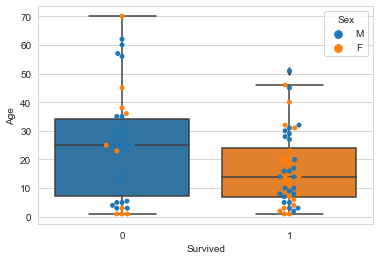

In [5]:
sns.set_style("whitegrid")
#sns.violinplot(x = 'Survived', y = 'Age', data = df)
ax = sns.boxplot(x = 'Survived', y = 'Age', data = df)
ax = sns.swarmplot(x = 'Survived', y = 'Age', data = df, hue="Sex")
plt.show()

In [7]:
def fit_logistic_reg_with_intercept(X, Y):
    X = sm.add_constant(X) # adding a constant
    log_reg_model = sm.Logit(y, X).fit()
    return log_reg_model

In [8]:
x_var = ['Age']
y_var = ['Survived']

X = df[x_var]
y = df[y_var]
logistic_model = fit_logistic_reg_with_intercept(X, y)
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.650221
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                   86
Model:                          Logit   Df Residuals:                       84
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                 0.05267
Time:                        21:37:52   Log-Likelihood:                -55.919
converged:                       True   LL-Null:                       -59.028
Covariance Type:            nonrobust   LLR p-value:                   0.01265
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9674      0.381      2.536      0.011       0.220       1.715
Age           -0.0354      0.

In [9]:
df_pred = pd.DataFrame({'const': [1], 'Age':[0]})
logistic_model.predict(df_pred)

0    0.7246
dtype: float64

# Answers

  - Final model is 
      - 0.9674 - 0.0354 * Age
  - Probability for Survival for Age = 0: 0.7246